# Expectations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from matplotlib import pyplot as plt

# Auxiliary functions

In [2]:
# Turns a numpy array into a frequency dictionary
def frequency_dict(x):
    counts = np.unique(x, return_counts=True)
    counts = map(lambda x, y: (x, y), counts[0], counts[1])
    counts = {x[0]: x[1] for x in counts}
    return counts

In [3]:
# from a df with probability distribution build a sample observations set
def random_dataframe(dist, samples):
    df = pd.DataFrame()
    df["Outcome"] = np.random.choice(dist["Values"], p=dist["Probs"], size=samples)
    return_mapping = pd.Series(dist["Returns"].values, index=dist["Values"]).to_dict()
    df["Returns"] = list(map(lambda x: return_mapping[x], df["Outcome"]))
    return df

In [4]:
def distribution_plots(dist):
    %matplotlib inline
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(20, 6))
    ax1.title.set_text("Probabilities i.e. expected frequencies")
    sns.barplot(x="Values", y="Probs", data=dist, ax=ax1)
    ax2.title.set_text("Returns per outcome")
    sns.barplot(x="Values", y="Returns", data=dist, ax=ax2)
    ax3.title.set_text("Weighted expected returns per outcome")
    sns.barplot(x="Values", y="Expected Returns", data=dist, ax=ax3)

In [5]:
def results_plots(df):
    %matplotlib inline
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 6))
    ax1.title.set_text("Table of frequences per outcome")
    sns.countplot(df["Outcome"], ax=ax1)
    ax2.title.set_text("Table of frequences per return")
    sns.countplot(df["Returns"], ax=ax2)

In [6]:
def gen_dist(values, probs, returns):
    dist = pd.DataFrame()
    dist["Values"] = values
    dist["Probs"] = probs
    dist["Returns"] = returns
    dist["Expected Returns"] = list(
        map(lambda x, y: x * y, dist["Probs"], dist["Returns"])
    )
    expected_returns = np.dot(dist["Probs"], dist["Returns"])
    print("Expected_Return: {}".format(round(expected_returns, 4)))
    print("Total_expected_returns: {}".format(round(expected_returns * sample_size, 4)))
    return dist, expected_returns

# Setting up our distribution

In [7]:
dist = pd.DataFrame()
sample_size = 10**6
price = 3.5
dist["Values"] = [1, 2, 3, 4, 5, 6]
dist["Probs"] = [1.0 / 6, 1.0 / 6, 1.0 / 6, 1.0 / 6, 1.0 / 6, 1.0 / 6]
dist["Returns"] = [5, 4, 9, 8, 20, 100]
# dist['Returns'] = list(map(lambda x:x-price,dist['Values']))

# Dist info

Expected_Return: 24.3333
Total_expected_returns: 24333333.3333


,Values,Probs,Returns,Expected Returns
0,1,0.166667,5,0.833333
1,2,0.166667,4,0.666667
2,3,0.166667,9,1.500000
3,4,0.166667,8,1.333333
4,5,0.166667,20,3.333333
5,6,0.166667,100,16.666667


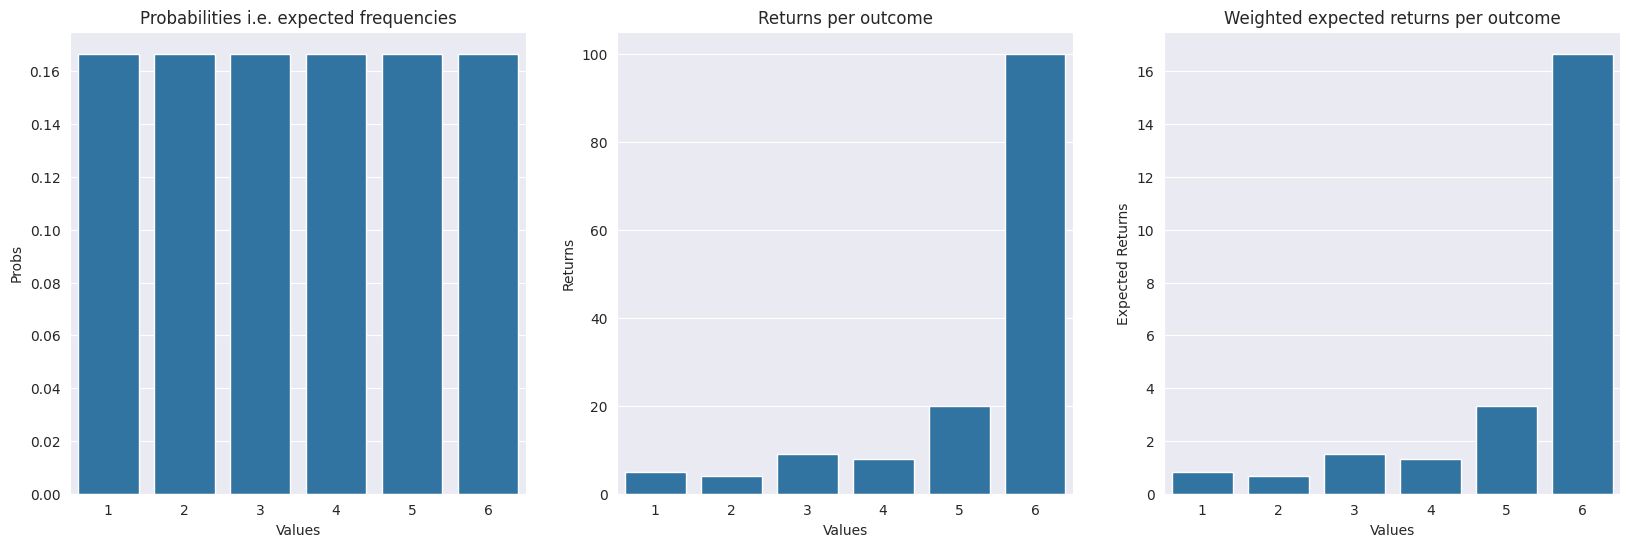

In [8]:
dist, expected_returns = gen_dist(dist["Values"], dist["Probs"], dist["Returns"])
distribution_plots(dist)
dist

# Results

In [ ]:
df = random_dataframe(dist, sample_size)
results_plots(df)

# Comparison of expectations

In [ ]:
total_expected_returns = np.sum(df["Returns"])
pd.DataFrame(
    {
        "Expected": [expected_returns, expected_returns * len(df)],
        "Observed": [total_expected_returns / len(df), total_expected_returns],
    },
    index=["Average Returns", "Total Returns"],
)